In [116]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import scipy.stats as stats
from sklearn import *
data = df = pd.read_csv('data.csv', delimiter=',')
data[['MMRCurrentRetailAveragePrice', 'VehOdo']].head()

,MMRCurrentRetailAveragePrice,VehOdo
0,11597.0,89046
1,11374.0,93593
2,7146.0,73807
3,4375.0,65617
4,6739.0,69367


In [117]:
data

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,1,0,12/7/2009,ADESA,2006,3,MAZDA,MAZDA3,i,4D SEDAN I,...,11597.0,12409.0,NaN,NaN,21973,33619,FL,7100.0,0,1113
1,2,0,12/7/2009,ADESA,2004,5,DODGE,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,...,11374.0,12791.0,NaN,NaN,19638,33619,FL,7600.0,0,1053
2,3,0,12/7/2009,ADESA,2005,4,DODGE,STRATUS V6,SXT,4D SEDAN SXT FFV,...,7146.0,8702.0,NaN,NaN,19638,33619,FL,4900.0,0,1389
3,4,0,12/7/2009,ADESA,2004,5,DODGE,NEON,SXT,4D SEDAN,...,4375.0,5518.0,NaN,NaN,19638,33619,FL,4100.0,0,630
4,5,0,12/7/2009,ADESA,2005,4,FORD,FOCUS,ZX3,2D COUPE ZX3,...,6739.0,7911.0,NaN,NaN,19638,33619,FL,4000.0,0,1020
5,6,0,12/7/2009,ADESA,2004,5,MITSUBISHI,GALANT 4C,ES,4D SEDAN ES,...,8149.0,9451.0,NaN,NaN,19638,33619,FL,5600.0,0,594
6,7,0,12/7/2009,ADESA,2004,5,KIA,SPECTRA,EX,4D SEDAN EX,...,6230.0,8603.0,NaN,NaN,19638,33619,FL,4200.0,0,533
7,8,0,12/7/2009,ADESA,2005,4,FORD,TAURUS,SE,4D SEDAN SE,...,6942.0,8242.0,NaN,NaN,19638,33619,FL,4500.0,0,825
8,9,0,12/7/2009,ADESA,2007,2,KIA,SPECTRA,EX,4D SEDAN EX,...,9637.0,10778.0,NaN,NaN,21973,33619,FL,5600.0,0,482
9,10,0,12/7/2009,ADESA,2007,2,FORD,FIVE HUNDRED,SEL,4D SEDAN SEL,...,12580.0,14845.0,NaN,NaN,21973,33619,FL,7700.0,0,1633


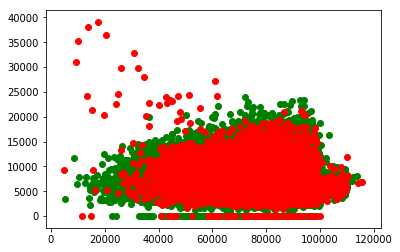

In [118]:
data1 = data[data['IsBadBuy'] == 0]
data2 = data[data['IsBadBuy'] == 1]

x = data1['VehOdo']
y = data1['MMRCurrentRetailAveragePrice']
plt.scatter(x, y, color='g')

x2 = data2['VehOdo']
y2 = data2['MMRCurrentRetailAveragePrice']
plt.scatter(x2, y2, color='r')

plt.show()

In [119]:
data.columns[data.isna().any()].tolist()

['Trim',
 'SubModel',
 'Color',
 'Transmission',
 'WheelTypeID',
 'WheelType',
 'Nationality',
 'Size',
 'TopThreeAmericanName',
 'MMRAcquisitionAuctionAveragePrice',
 'MMRAcquisitionAuctionCleanPrice',
 'MMRAcquisitionRetailAveragePrice',
 'MMRAcquisitonRetailCleanPrice',
 'MMRCurrentAuctionAveragePrice',
 'MMRCurrentAuctionCleanPrice',
 'MMRCurrentRetailAveragePrice',
 'MMRCurrentRetailCleanPrice',
 'PRIMEUNIT',
 'AUCGUART']

In [120]:
mean = data['MMRAcquisitionRetailAveragePrice'].mean()
data['MMRCurrentRetailAveragePrice'].fillna(mean, inplace=True)

In [121]:
model1 = linear_model.LinearRegression()
model1.fit(data.loc[:,['VehOdo','MMRCurrentRetailAveragePrice']], data['IsBadBuy'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [141]:
prediction = model1.predict(data.loc[:,['VehOdo','MMRCurrentRetailAveragePrice']]) 

In [142]:
predictionClass = [1 if prediction[i]>0.5 else 0 for i in range(data.shape[0])]

In [143]:
print(metrics.classification_report(data['IsBadBuy'], predictionClass, target_names=['class0', 'class1']))

              precision    recall  f1-score   support

      class0       0.88      1.00      0.93     64007
      class1       0.00      0.00      0.00      8976

   micro avg       0.88      0.88      0.88     72983
   macro avg       0.44      0.50      0.47     72983
weighted avg       0.77      0.88      0.82     72983



/home/artur/anaconda3/envs/ASOI/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [144]:
print(metrics.confusion_matrix(data['IsBadBuy'], predictionClass))

[[64007     0]
 [ 8976     0]]


In [145]:
model2 = tree.DecisionTreeClassifier(max_depth=20)
model2.fit(data.loc[:,['VehOdo','MMRCurrentRetailAveragePrice']], data['IsBadBuy'])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=20,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [127]:
prediction2 = model2.predict(data.loc[:,['VehOdo','MMRCurrentRetailAveragePrice']]) 

In [128]:
predictionClass2 = [1 if prediction2[i]>0.5 else 0 for i in range(data.shape[0])]

In [129]:
print(metrics.classification_report(data['IsBadBuy'], predictionClass2, target_names=['class0', 'class1']))

              precision    recall  f1-score   support

      class0       0.91      1.00      0.95     64007
      class1       0.96      0.29      0.44      8976

   micro avg       0.91      0.91      0.91     72983
   macro avg       0.94      0.64      0.70     72983
weighted avg       0.92      0.91      0.89     72983



In [130]:
print(metrics.confusion_matrix(data['IsBadBuy'], predictionClass2))

[[63910    97]
 [ 6384  2592]]


In [131]:
predictionProb = model2.predict_proba(data.loc[:,['VehOdo','MMRCurrentRetailAveragePrice']])

In [132]:
predictionClass3 = [0 if predictionProb[i][0]>0.5 else 1 for i in range(data.shape[0])]

In [133]:
print(metrics.classification_report(data['IsBadBuy'], predictionClass3, target_names=['class0', 'class1']))

              precision    recall  f1-score   support

      class0       0.91      1.00      0.95     64007
      class1       0.94      0.30      0.45      8976

   micro avg       0.91      0.91      0.91     72983
   macro avg       0.93      0.65      0.70     72983
weighted avg       0.91      0.91      0.89     72983



In [134]:
print(metrics.confusion_matrix(data['IsBadBuy'], predictionClass3))

[[63847   160]
 [ 6321  2655]]


In [135]:
data.shape

(72983, 34)

In [136]:
dataTrain = data.loc[0:34999,]
dataTest = data.loc[35000:69999,]

In [137]:
predictionProb = model2.predict_proba(dataTrain.loc[:,['VehOdo','MMRCurrentRetailAveragePrice']])
predictionClass4 = [0 if predictionProb[i][0]>0.5 else 1 for i in range(dataTrain.shape[0])]

In [138]:
metrics.accuracy_score(dataTrain['IsBadBuy'], predictionClass4)

0.9155428571428571

In [139]:
metrics.accuracy_score(dataTest['IsBadBuy'], predictionClass4)

0.8449714285714286

In [140]:
lossTrue0Pred1 = 100
lossTrue1Pred0 = 1000